Indexing 25 words into the BST...
Displaying full tree...


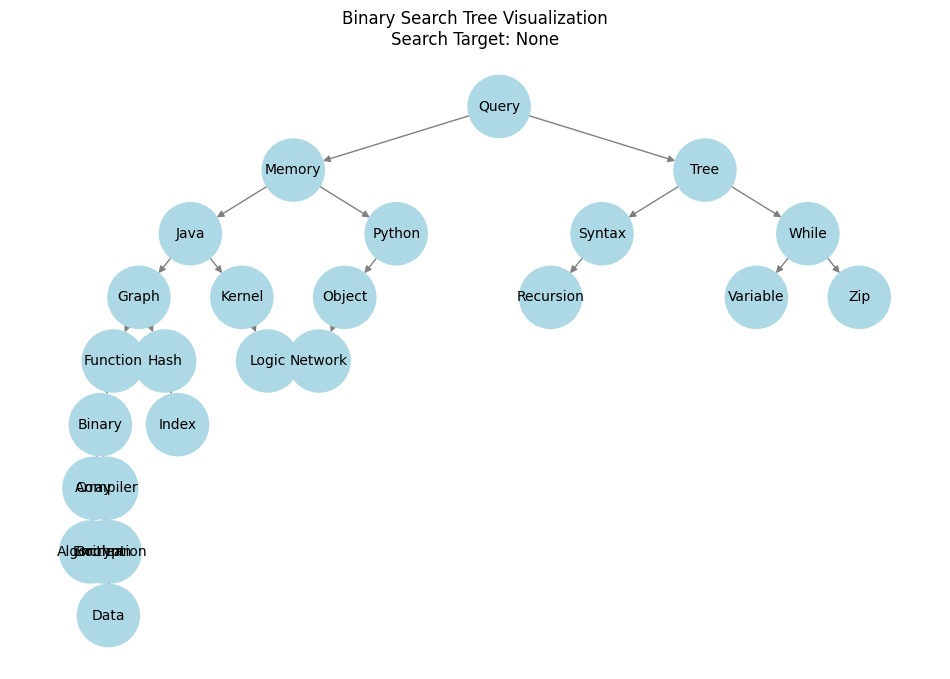

Visualizing search path for: Recursion


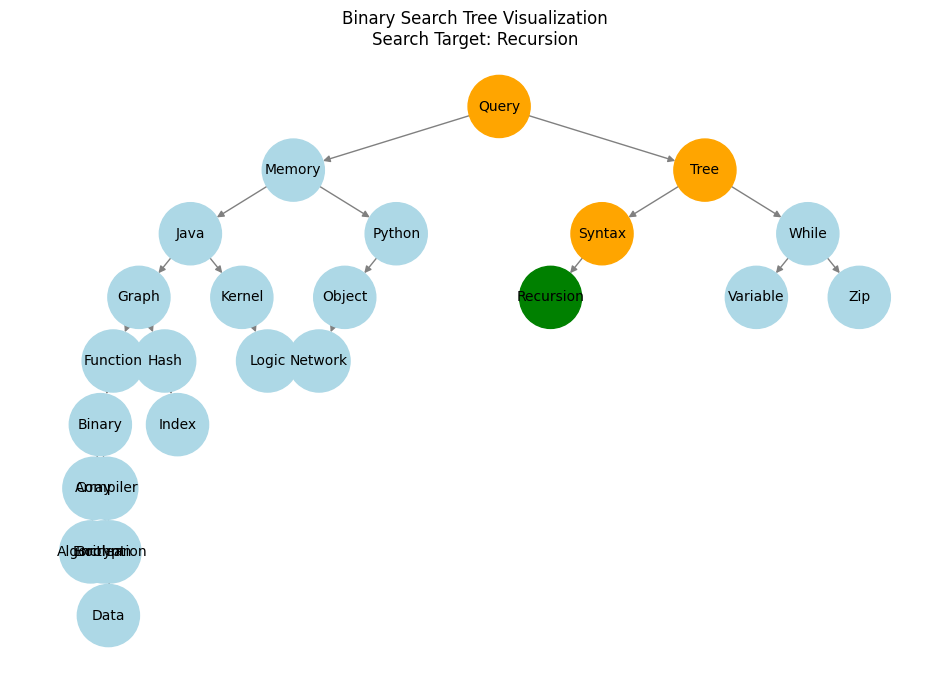

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None
        self.visual_graph = nx.DiGraph()
        self.pos = {}  # Store node positions for plotting

    def insert(self, key):
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursive(self.root, key)

    def _insert_recursive(self, current, key):
        if key < current.key:
            if current.left is None:
                current.left = Node(key)
            else:
                self._insert_recursive(current.left, key)
        elif key > current.key:
            if current.right is None:
                current.right = Node(key)
            else:
                self._insert_recursive(current.right, key)
        # If key == current.key, we do nothing (duplicate handling)

    def search_path(self, key):
        """Returns a list of nodes visited during the search for 'key'."""
        path = []
        current = self.root
        while current:
            path.append(current.key)
            if key == current.key:
                return path, True
            elif key < current.key:
                current = current.left
            else:
                current = current.right
        return path, False

    def build_visual_graph(self, node, x=0, y=0, layer=1):
        """Recursively builds the networkx graph and calculates positions."""
        if node is not None:
            self.visual_graph.add_node(node.key)
            self.pos[node.key] = (x, y)
            
            # spacing gets smaller as we go deeper
            spacing = 10 / (2 ** layer) 
            
            if node.left:
                self.visual_graph.add_edge(node.key, node.left.key)
                self.build_visual_graph(node.left, x - spacing, y - 1, layer + 1)
            
            if node.right:
                self.visual_graph.add_edge(node.key, node.right.key)
                self.build_visual_graph(node.right, x + spacing, y - 1, layer + 1)

    def visualize(self, search_target=None):
        self.visual_graph.clear()
        self.pos.clear()
        self.build_visual_graph(self.root)

        plt.figure(figsize=(12, 8))
        ax = plt.gca()
        ax.set_title(f"Binary Search Tree Visualization\nSearch Target: {search_target if search_target else 'None'}")

        # Default Colors
        node_colors = ['lightblue' for _ in self.visual_graph.nodes()]
        edge_colors = ['gray' for _ in self.visual_graph.edges()]

        # If we are searching, highlight the path
        if search_target:
            path, found = self.search_path(search_target)
            
            # Color logic
            color_map = []
            for node in self.visual_graph.nodes():
                if node in path:
                    if node == search_target and found:
                        color_map.append('green')  # Found target
                    else:
                        color_map.append('orange') # Visited path
                else:
                    color_map.append('lightblue') # Unvisited
            node_colors = color_map

        # Draw the graph
        nx.draw(self.visual_graph, self.pos, with_labels=True, 
                node_size=2000, node_color=node_colors, font_size=10, 
                edge_color=edge_colors, arrows=True)
        plt.show()

# --- DRIVER CODE (20+ Examples) ---
if __name__ == "__main__":
    bst = BST()
    
    # 20+ Computer Science related keywords for the Indexer
    dataset = [
        "Algorithm", "Binary", "Compiler", "Data", "Encryption", 
        "Function", "Graph", "Hash", "Index", "Java", 
        "Kernel", "Logic", "Memory", "Network", "Object", 
        "Python", "Query", "Recursion", "Syntax", "Tree", 
        "Variable", "While", "Zip", "Array", "Boolean"
    ]
    
    # Shuffle to ensure the tree isn't just a straight line (balanced-ish)
    # Using a fixed seed so your presentation demo is consistent every time
    random.seed(42) 
    random.shuffle(dataset)

    print(f"Indexing {len(dataset)} words into the BST...")
    for word in dataset:
        bst.insert(word)

    # Example 1: Show the full tree
    print("Displaying full tree...")
    bst.visualize()

    # Example 2: Visualize a search for 'the target'
    target = "Recursion"
    print(f"Visualizing search path for: {target}")
    bst.visualize(search_target=target)